<a href="https://colab.research.google.com/github/yazfir/Projects2021/blob/master/ProysDatacademy/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística usando Scikit Learn

<h3>La actividad consistirá en cargar un set de datos (MNIST) con una serie de imagenes de dígitos y nuestro modelo de regresión logística tratará de predecir estos dígitos dependiendo de la imágen.</h3>

## Importar nuestras librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar y explorar nuestro set de datos

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [5]:
digits.data.shape  # 1797 imagenes, 64 pixeles (8x8)

(1797, 64)

In [7]:
digit_sample = digits.data[0]

# Los números representan a los pixeles. Los pixeles cuando usamos un formato 
# de color de 1 a 256 bits, estos valores serán la intensidad con que se 
# representan los pixeles. Van de valores 0 a 255. Esta es la forma en la que las
# Computadoras leen las imagenes o bueno esta imagen en la manera en la cual esta 
# codificada.

digit_sample

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Al ser un problema de aprendizaje supervisado contamos con datos ya etiquetados a los que queremos llegar como resultado.

In [8]:
digits.target.shape

(1797,)

In [9]:
digits.target[0]

0

## Graficando nuestra imagen

In [11]:
digit_reshaped = digit_sample.reshape(8,8)
digit_reshaped

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

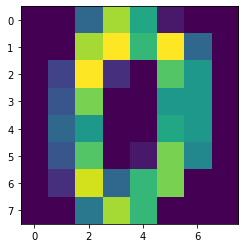

In [13]:
digit_reshaped
plt.imshow(digit_reshaped)

## Graficando varias imagenes

In [35]:
#Haciendo uso del método ZIP el cual regresa una tupla de valores
numbers_sample = list(zip(digits.data[30:40], digits.target[30:40])) # Datos (imagen), Etiqueta

numbers_sample

[(array([ 0.,  0., 10., 14., 11.,  3.,  0.,  0.,  0.,  4., 16., 13.,  6.,
         14.,  1.,  0.,  0.,  4., 16.,  2.,  0., 11.,  7.,  0.,  0.,  8.,
         16.,  0.,  0., 10.,  5.,  0.,  0.,  8., 16.,  0.,  0., 14.,  4.,
          0.,  0.,  8., 16.,  0.,  1., 16.,  1.,  0.,  0.,  4., 16.,  1.,
         11., 15.,  0.,  0.,  0.,  0., 11., 16., 12.,  3.,  0.,  0.]), 0),
 (array([ 0.,  0.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
          6.,  0.,  0.,  0.,  0.,  5., 15., 13., 11.,  0.,  0.,  0.,  0.,
          0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,
          0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  3.,
          4.,  4., 16.,  2.,  0.,  0.,  2., 15., 13., 14., 13.,  2.]), 9),
 (array([ 0.,  2., 13., 16., 16., 16., 11.,  0.,  0.,  5., 16., 10.,  5.,
          4.,  1.,  0.,  0.,  6., 16.,  7.,  3.,  0.,  0.,  0.,  0.,  9.,
         16., 16., 16.,  6.,  0.,  0.,  0.,  3.,  8.,  4., 11., 15.,  0.,
          0.,  0.,  0.,  0.,  1., 12

In [36]:
np.array(numbers_sample).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(10, 2)

In [37]:
for index, (image, label) in enumerate(numbers_sample):
  print(index + 1, label)


1 0
2 9
3 5
4 5
5 6
6 5
7 0
8 9
9 8
10 9


Lo anterior se representa como, la primer imagen es un cero, la segunda es un nueve, la tercera es un cinco, cuarta un cinco.... etc.

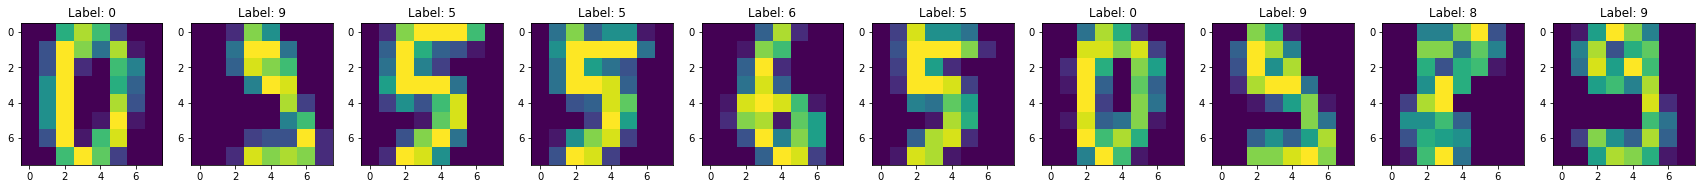

In [38]:
plt.figure(figsize=(30,30))
for index, (image, label) in enumerate(numbers_sample):
  digit_reshaped = image.reshape(8,8)
  plt.subplot(1, len(numbers_sample), index + 1)
  plt.imshow(digit_reshaped)
  plt.title(f'Label: {label}')

## Fase de entranamiento

<h3>Clasificador. Recuerda que cuando realizamos problemas de regresión lo que se trata de hacer es encontrar o predecir valores. Por ejem. en la regresión lineal lo que intentamos es predecir un valor dependiendo de la recta que tengamos. Cuando hacemos problemas de clasificación, como el que se hará a continuación a través de una regresión logística (nos sirve para crear un clasificador), lo que intentamos predecir no son valores variados como 10, 20 o 40. Lo que se intenta predecir es una serie de valores que los consideramos clases; en este caso los dígitos que nosotros queremos predecir van en un rango del 0 al 9 (10 clases). </h3>


### 1. Dividiendo nuestro set de datos en entrenamiento y pruebas

In [39]:
from sklearn.model_selection import train_test_split #Para dividir nuestros datos de entrenamiento

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
print("Len train", len(x_train))
print("Len train", len(x_test))

Len train 1437
Len train 360


### 2. Importando nuestro modelo

In [40]:
from sklearn.linear_model import LogisticRegression

### 3. Creando la instancia de nuestro modelo

Creamos nuestro pipeline

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression()) #Primero Escalamos nuestros datos y luego aplica la regresión logística

### 4. Entrenando nuestro modelo 



Estandariza nuestros datos y después entrena el modelo

In [42]:
pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

## Evaluando nuestro modelo

La regresión logística con Scikit-Learn usa por defecto la presición como métrica de evaluación del modelo. La presición se define como: 

$${\text{Precisión}=\frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}}$$

In [43]:
score = pipe.score(x_test, y_test)

score  # Lo cual quiere decir el 97% de las veces va a predecir de manera correcta

0.9722222222222222

## Haciendo una predicción con nuestro modelo

In [52]:
x_test[0]

array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
        0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
        0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.])

In [45]:
guinea_pig = x_test[0]  # Conejillo de Indias

pipe.predict(guinea_pig.reshape(1,-1))

array([6])

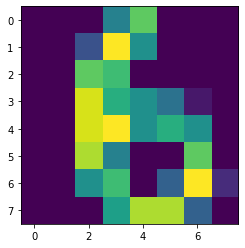

In [46]:
plt.imshow(guinea_pig.reshape(8,8))

In [47]:
predictions = pipe.predict(x_test)

predictions

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

## Creando y graficando una matriz de confusión 

Una matriz de confusión es una forma de visualizar el desempéño de nuestro algoritmo comparando el valor actual de la etiqueta v.s. el de la predicción realizada por el modelo.

In [61]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)

cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

Text(60.0, 0.5, 'Valor Actual (Target)')

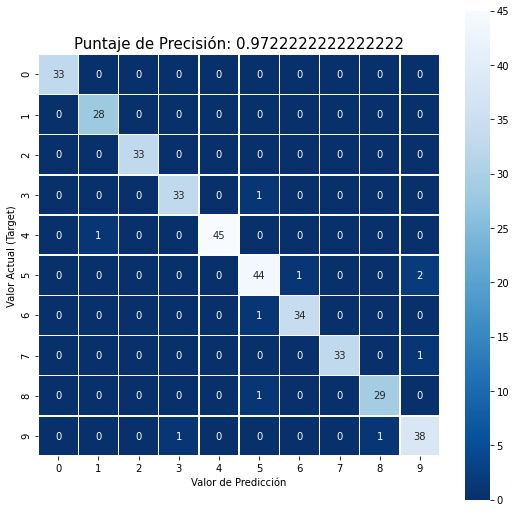

In [65]:
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, linewidths=0.5, square=True, cmap='Blues_r')

plt.title(f'Puntaje de Precisión: {score}', fontsize=15)
plt.xlabel('Valor de Predicción')
plt.ylabel('Valor Actual (Target)')

<h3>Lectura de la matriz:
<br>- Cuando el valor actual y predicción coinciden entonces esta se toma como correcta.
<br>- En el caso de 0 tuvimos 33 correctas.
<br>- En el caso de 1 tuvimos 28 correctas.
<br>- En el caso de 2 tuvimos 33 correctas.
<br>- En el caso de 3 tuvimos 33 correctas y una incorrecta. La predijo como 5.
<br>- ...
<br>- ...
</h3>

## Lecturas Recomendadas

[THE MNIST DATABASE
of handwritten digits](http://yann.lecun.com/exdb/mnist/)

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

